**Tarea 4 - Métodos numéricos**

##Leslie Janeth Quincosa Ramírez

In [213]:
import numpy as np
from math import exp, log
import pandas as pd
from matplotlib import pyplot as plt

In [214]:
#Funciones auxiliares

#Matriz triangular superior

def TriangularSup(A, b):
  det = 1
  n = A.shape[0]
  x = np.zeros(n)
  tol = 0.0000001

  for i in reversed(range(n)): #Es la misma función que TriangularInf solo que empezamos de n a 0
    det *= A[i][i]

    if abs(det) < tol:
      print("No hay solución al sistema")
      return

    sum = 0
    for j in range(i, n):
      sum += x[j]*(A[i][j])

    x[i] = (b[i]- sum)/A[i][i]
  return x
#Metodo de eliminación Gauss-Jordan

def GaussJordan(A_original, b_original):
  A = A_original.astype('float64')
  b = b_original.astype('float64')
  n = A.shape[0]
  tol = 0.00001

  for k in range(n):
    fila_pivote = k
    for j in range(k+1, n):
      if abs(A[j, k]) > abs(A[fila_pivote, k]):
        fila_pivote = j

      #Pivoteo
      A[[k, fila_pivote]] = A[[fila_pivote, k]] #intercambio la fila donde está el pivote mayor
      b[k], b[fila_pivote] = b[fila_pivote], b[k]

    # checar si pivote es practicasmente 0
    if abs(A[k, k ]) < tol:
      break
    for i in range(k+1, n):
      m_ik = A[i, k]/A[k, k]

      for j in range(k, n):
        A[i,j] = A[i, j] - m_ik*A[k, j]

      b[i] = b[i] - m_ik*b[k]

  print(A)
  print(b)

  return TriangularSup(A, b)

#Ejercicio 2

 Considerar la función

$$
f(x)=\mathrm{e}^{6 x}+3(\ln 2)^{2} \mathrm{e}^{2 x}-(\ln 8) \mathrm{e}^{4 x}-(\ln 2)^{3}
$$

(a) Implementa un método de localización de raíces y obtén un intervalo cercano a la raíz.

(b) Usar el método de Newton o de la secante para aproximar a una raíz de $f$, tomando $x_{0}$ dentro del intervalo propuesto en el apartado anterior y una condición de paro $|x_{k+1}-x_{k}|<0.0002$. Presenta la tabla de iterados.

(c) Luego construye una sucesión $\left\{x_{k}\right\}_{k \geq 0}$ mediante el método de Aitken que aproxime la raíz de $f$. Presenta la tabla de iterados ¿Se aceleró la covergencia? Justifica tu respuesta.


a) Consideremos a la función $f(x)=\mathrm{e}^{6 x}+3(\ln 2)^{2} \mathrm{e}^{2 x}-(\ln 8) \mathrm{e}^{4 x}-(\ln 2)^{3}$ y para aproximar a sus raíces, utilizaremos el método de bisección. Sabemos que este método siempre converge. Utilizaremos una tolerancia de $|b-a|<1$ para determinar el intervalo donde se encuentra la raíz de $f(x)$. Usando este método, obtenemos que un intervalo sería

$$I= [-1,0]$$

In [215]:
#Parametros
Max_Iter = 1000

In [216]:
def f(x):
  return exp(6*x)+ 3*(log(2))**2*exp(2*x)-log(8)*exp(4*x)-(log(2))**3

def df(x):
  return  6*exp(6*x)+ 6*(log(2))**2*exp(2*x)-4*log(8)*exp(4*x)

In [217]:
#Funciones de prueba

## dom [-10, 10] df_x = 1
def f1(x):
    y = 2 + x
    return y

def df1(x):
  return 1

## dom [-10, 10] df_x =2*x
def f2 (x):
    y = x**2 + 5
    return y

def df2(x):
    y = 2*x
    return y

## dom [-np.pi, np.pi] df_x = np.cos(x)
def f3 (x):
    y = np.sin(x)
    return y

def df3(x):
    y = np.cos(x)
    return y

## dom [-np.pi, np.pi] df_x = -np.sin(x)
def f4 (x):
    y = np.cos(x)
    return y

def df4(x):
    y = -np.sin(x)
    return y

#Método de Bisección

In [218]:
#Bisección

def biseccion(f, a: float, b: float, Tol):
  if f(a)*f(b) > 0:
    return print("No hay raices")

  while abs(b-a) > Tol:
    m = (a+b)/2

    if abs(f(m)) < 1e-5 :
      return m

    if f(m)*f(a)>0:
      a = m
    else:
      b = m

  return (a+b)/2

In [219]:
epsilon = 0.5
x0 = biseccion(f, -2, 2, 1)
x0

-0.5

In [220]:
print("El intervalo dónde se encuentra la raíz es: [", x0-epsilon, ",", x0 + epsilon, "]" )

El intervalo dónde se encuentra la raíz es: [ -1.0 , 0.0 ]


#Método de Newton

Implementando el método de Newton y usando el punto medio del intervalo del método de la bisección, tenemos que la raíz es
$$x* = -0.224739834 $$

Obtenemos este valor con tan solo 5 iteraciones. A continuación se presenta la tabla de iterados.

In [221]:
#Metodo de Newton

def Newton(f, df, x0: float, Tol, Max_Iter):
  xk = x0
  lista = [] #Es para la tabla de iterados
  lista.append(x0)

  for i in range(Max_Iter):
    if abs(f(xk)) < Tol:
      lista.append(xk)
      return xk, i+1, lista

    xk = xk - f(xk)/df(xk)
    lista.append(xk)

  if abs(f(xk)) < Tol:
    lista.append(xk)

    return xk, i+1, lista

In [222]:
x, k, listaN = Newton(f, df, x0, 0.0002, Max_Iter)

print("El valor de la raiz es: ", x)
print("El número de iteraciones", k)

El valor de la raiz es:  -0.2247398341493904
El número de iteraciones 5


In [223]:
tabla1 = pd.DataFrame({"x_k:": listaN,
        "|x_k - x_{k-1}|": [None] + [abs(listaN[i+1])-abs(listaN[i]) for i in range (len(listaN)-1)]
    },
    index = [f"Iteración {i}" for i in range(len(listaN))]
)

tabla1

,x_k:,|x_k - x_{k-1}|
Iteración 0,-0.500000,NaN
Iteración 1,-0.352638,-0.147362
Iteración 2,-0.285436,-0.067202
Iteración 3,-0.247646,-0.037790
Iteración 4,-0.224740,-0.022907
Iteración 5,-0.224740,0.000000


<ipython-input-224-f4478623fce4>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(listaN, [f(x) for x in listaN], 'bo', color='blue')


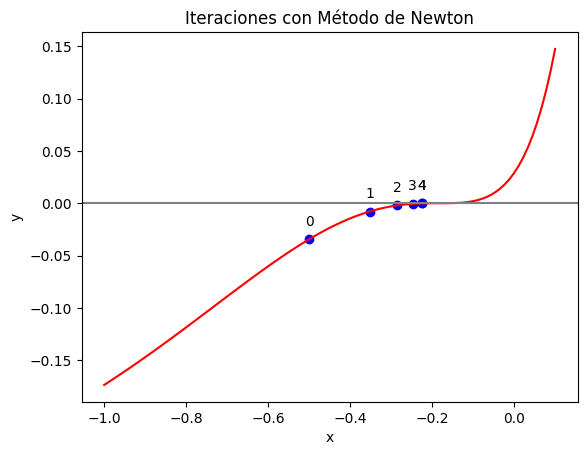

In [224]:
plt.plot(listaN, [f(x) for x in listaN], 'bo', color='blue')
for x,y in zip(listaN, [f(x) for x in listaN]):

    #\label = "{:.2f}".format(y)

    plt.annotate(listaN.index(x), # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


fi = np.vectorize(f)
x = np.linspace(x0-.5, x0+.6, 100)

plt.plot(x, fi(x), color='red')
plt.axhline(y = 0.0, color = 'gray', linestyle = '-')
plt.xlabel('x')
plt.ylabel('y')

# displaying the title
plt.title("Iteraciones con Método de Newton")

plt.show()

#Método de la secante

Por otro lado, vamos a utilizar el método de la Secante, con esta implementación y utilizando el los puntos extremos del intervalo $I$, tenemos que el método converge en $3$ iteraciones, pero eligiendo otro intervalo tenía más iteraciones. Recordemos que estos métodos son sencibles al punto inicial. A continuación mostramos la tabla de iterados del método de la secante.

In [225]:
#Metodo de la secante

def MetodoSecante(f, x0, x1, Tol, Max_Iter):
  k = 1
  xk = x0
  xk1 = x1
  lista = []
  lista.append(x0)
  lista.append(x1)

  while np.abs(f(xk1)) > Tol:
    x_kplus1 = xk1 - (f(xk1)*(xk1-xk))/ (f(xk1) - f(xk))
    xk = xk1
    xk1 = x_kplus1
    k = k+1
    lista.append(xk1)

  return xk1, k, lista

In [226]:
x, k, lista = MetodoSecante(f, x0 - epsilon, x0 + epsilon, 0.0002, Max_Iter)

print("El valor de la raiz es: ", x)
print("El número de iteraciones", k)

El valor de la raiz es:  -0.143708493788831
El número de iteraciones 3


In [227]:
tabla2 = pd.DataFrame({"x_k:": lista,
        "|x_k - x_{k-1}|": [None] + [abs(lista[i+1])-abs(lista[i]) for i in range (len(lista)-1)]
    },
    index = [f"Iteración {i}" for i in range(len(lista))]
)

tabla2

,x_k:,|x_k - x_{k-1}|
Iteración 0,-1.000000,NaN
Iteración 1,0.000000,-1.000000
Iteración 2,-0.142710,0.142710
Iteración 3,-0.143708,0.000998


<ipython-input-228-7b9d5d31c20e>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(lista, [f(x) for x in lista], 'bo', color='blue')


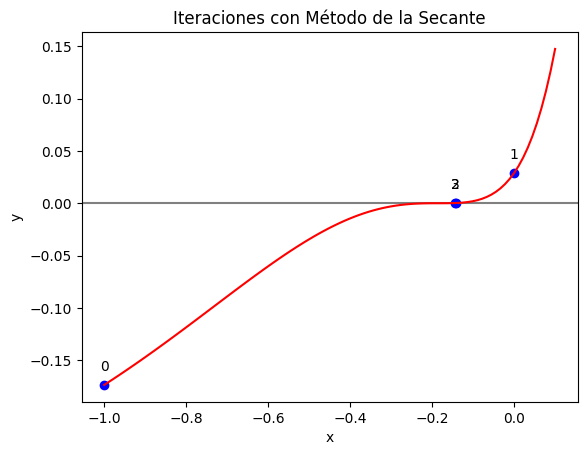

In [228]:
#Grafica Método de la secante
plt.plot(lista, [f(x) for x in lista], 'bo', color='blue')
for x,y in zip(lista, [f(x) for x in lista]):

    #\label = "{:.2f}".format(y)

    plt.annotate(lista.index(x), # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


fi = np.vectorize(f)
x = np.linspace(x0-.5, x0+.6, 100)
plt.axhline(y = 0.0, color = 'gray', linestyle = '-')

plt.xlabel('x')
plt.ylabel('y')

# displaying the title
plt.title("Iteraciones con Método de la Secante")

plt.plot(x, fi(x), color='red')

plt.show()

#Método de aceleración de Aitken

Implementando el método de Aitken para acelerar la convergencia a la raíz. Utilicé la sucesión resultante del método de Newton para acelerar las $8$ iteraciones. Notemos que sí se acelera el método y ahora tenemos $3$ iteraciones y a continuación mostraremos la tabla de iterados y la gráfica de convergencia a la raíz.

In [229]:
#Metodo de Aitken

def Aitken(xn):
  A_s = []
  n = len(xn)

  if n < 3:
    return print("No se puede utilizar este método")

  for i in range(n-2):
    yi = xn[i] - (xn[i+1] - xn[i])**2/(xn[i+2] - 2*xn[i+1] +xn[i])
    A_s.append(yi)

  return A_s

In [230]:
AitkenN = Aitken(listaN)

In [231]:
tabla3 = pd.DataFrame({"x_k:": AitkenN,
        "|x_k - x_{k-1}|": [None] + [abs(AitkenN[i+1])-abs(AitkenN[i]) for i in range (len(AitkenN)-1)]
    },
    index = [f"Iteración {i}" for i in range(len(AitkenN))]
)

tabla3

,x_k:,|x_k - x_{k-1}|
Iteración 0,-0.229097,NaN
Iteración 1,-0.199092,-0.030005
Iteración 2,-0.189485,-0.009608
Iteración 3,-0.224740,0.035255


<ipython-input-232-eaa255d67b6a>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(AitkenN, [f(x) for x in AitkenN], 'bo', color='blue')


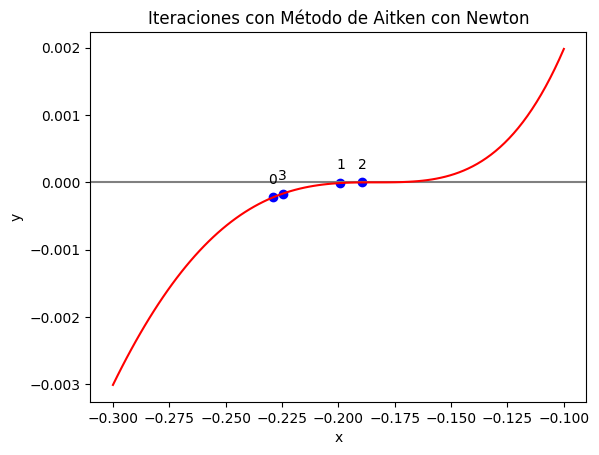

In [232]:
#Grafica Método de Aitken
plt.plot(AitkenN, [f(x) for x in AitkenN], 'bo', color='blue')
for x,y in zip(AitkenN, [f(x) for x in AitkenN]):

    #\label = "{:.2f}".format(y)

    plt.annotate(AitkenN.index(x), # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


fi = np.vectorize(f)
x = np.linspace(-.3 , -.1, 100)
plt.axhline(y = 0.0, color = 'gray', linestyle = '-')

plt.xlabel('x')
plt.ylabel('y')

# displaying the title
plt.title("Iteraciones con Método de Aitken con Newton")

plt.plot(x, fi(x), color='red')

plt.show()

#Ejercicio 3.

#Ejercicio 3. Newton Multivariado

Considerar el sistema no lineal

$$
\begin{aligned}
& x^{2}-10 x+y^{2}+8=0 \\
& x y^{2}+x-10 y+8=0 .
\end{aligned}
$$

(a) Aplicar el método de Newton adaptado para sistemas con $X_{0}=$ $(1,-1)$, considera una tolerancia de $10^{-6}$.

(b) Recordar que la resolución del sistema anterior también se puede trabajar como un problema de optimización como sigue

$$
\min \|F(X)-0\|_{2}^{2} \Rightarrow \nabla\left(\sum_{i=1}^{n}\left(f_{i}(X)\right)^{2}\right)=0
$$

donde $F=\left(f_{1}, \ldots, f_{n}\right)^{T}$ y $X=\left(x_{1}, \ldots, x_{n}\right)^{T}$. Aplicar el método de Newton al sistema de la derecha considerando como paso inicial el mismo $X_{0}$ propuesto anteriormente. Comparar los resultados y presentar la tabla de iterados para cada método.

En clase vimos que la extensión del método de Newton es
$$x_{k+1} =x_k - \nabla f^{-1}(x_k)f(x_k) $$

Para evitar calcular la inversa de $\nabla f$, resolvemos el sistema

$$ \nabla f(x_k)f(x_k)z = -f(x,y)$$

donde $z=x_{k+1} - x_k$.

In [233]:
def F(x, y):
    f1 = x**2 - 10*x + y**2 + 8
    f2 = x*y**2 + x - 10*y + 8
    return np.array([f1, f2])

#Jacobiano de f
def jacobian_F(x, y):
    df1_dx = 2*x - 10
    df1_dy = 2*y
    df2_dx = y**2 + 1
    df2_dy = 2*x*y - 10
    return np.array([[df1_dx, df1_dy], [df2_dx, df2_dy]])



3.a) Aplicaremos el método de Newton multivariado a la función

$$
\begin{aligned}
F(x, y)  =\left(f_{1}(x, y), f_{2}(x, y)\right) =\left(x^{2}-10 x+y^{2}+8, x y^{2}+x-10 y+8\right)
\end{aligned}
$$

Por lo tanto calcularemos el gradiente de $F$

$$
\begin{aligned}
\nabla F(x, y) & =\left[\begin{array}{ll}
\frac{\partial f_{1}}{\partial x}(x, y) & \frac{\partial f_{1}}{\partial y}(x, y) \\
\frac{\partial f_{2}}{\partial x}(x, y) & \frac{\partial f_{2}}{\partial y}(x, y)
\end{array}\right] \\
& =\left[\begin{array}{cc}
2 x-10 & 2 y \\
y^{2}+1 & 2 x y+10
\end{array}\right]
\end{aligned}
$$

Aplicando el método obtenemos que la raíz de la función con el punto inicial $x_{0}=(1,-1)$ y tolerancia $10^{-6}$ es $x^{*}=[1,1]$.

Veamos la tabla de iterados.

In [243]:
def Newton_multivariado(F, Jacobian_F, x0, tol=1e-6, max_iter=100):
    xk = np.array(x0, dtype=float)
    k = 0
    lista = []
    lista.append(x0)

    while k < max_iter:
        z = GaussJordan(Jacobian_F(xk[0], xk[1]), -F(xk[0], xk[1]))
        xk1 = z + xk

        if np.linalg.norm(xk1 -xk ) < tol:
            return xk1, lista

        xk = xk1
        lista.append(xk1)
        k = k+1

    return xk, lista

In [ ]:
x_0 = np.array([-1, 1])
raiz, listaNM = Newton_multivariado(F, jacobian_F , x_0, tol=1e-6, max_iter=100)

In [245]:
listaNM

[array([-1,  1]),
 array([0.65714286, 0.94285714]),
 array([0.98436172, 0.99203838]),
 array([0.99994902, 0.99994885]),
 array([1., 1.])]

In [246]:
raiz

array([1., 1.])

In [247]:
tabla4 = pd.DataFrame({"x_k:": listaNM,
        "|x_k - x_{k-1}|": [None] + [abs(listaNM[i+1])-abs(listaNM[i]) for i in range (len(listaNM)-1)]
    },
    index = [f"Iteración {i}" for i in range(len(listaNM))]
)

tabla4

,x_k:,|x_k - x_{k-1}|
Iteración 0,"[-1, 1]",None
Iteración 1,"[0.6571428571428573, 0.9428571428571428]","[-0.34285714285714275, -0.05714285714285716]"
Iteración 2,"[0.9843617154007134, 0.9920383774301256]","[0.3272188582578561, 0.049181234572982735]"
Iteración 3,"[0.9999490218158763, 0.9999488545408886]","[0.015587306415162927, 0.007910477110762981]"
Iteración 4,"[0.9999999990437501, 0.9999999987822062]","[5.0977227873838515e-05, 5.114424131769102e-05]"


#Optimización con Newton Multivariado

3.b) Sea $h(x)=\sum_{i=1}^{n}\left(f_{i}(x)\right)^{2} \quad$ entonces

$$
h(x)=\left(x^{2}-10 x+y^{2}+8\right)^{2}+\left(x y^{2}+x-10 y+8\right)^{2}=f_{1}(x, y)^{2}+f_{2}(x, y)^{2}
$$

entonces el problema de optimización par resolver es $\nabla h(x)=0$ Por lo tanto

$$
\begin{aligned}
F(x,y) = \nabla h(x) = \left(\frac{\partial (f_{1}(x, y)^{2} +f_{2}(x, y)^{2} )}{\partial x}, \frac{\partial (f_{1}(x, y)^{2} +f_{2}(x, y)^{2} )}{\partial y} \right)
\end{aligned}
$$

De modo que ahora en el método de Newton moltivariado tenemos que $F(x, y)=\nabla h(x, y)$. De modo que calcularemos $\nabla F(x, y)=H_{h}(x, y)$ dande esto es la matric Hessiana de $h(x, y)$.

$$
H_{h(x, y)}=\left[\begin{array}{ll}
\frac{\partial F}{\partial x}(x, y) & \frac{\partial F}{\partial y}(x, y) \\
\frac{\partial F}{\partial x}(x, y) & \frac{\partial F}{\partial y}(x, y)
\end{array}\right]
$$

donde

$$
\begin{aligned}
& \frac{\partial^{2}}{\partial x^{2}} h(x, y)=2\left(2 x^{2}-20 x+2 y^{2}+4(x-5)^{2}+\left(y^{2}+1\right)^{2}+16\right) \\
& \frac{\partial^{2}}{\partial x y} h(x, y)=\frac{\partial}{\partial y x}(x, y)=4\left(2 y(x-5)+y\left(x y^{2}+x-10 y+8\right)+\left(y^{2}+1\right)(x y-5)\right) \\
& \frac{\partial^{2}}{\partial y^{2}} h(x, y)=12 x^{2} y^{2}+8 x^{2}-120 x y-8 x+12 y^{2}+232
\end{aligned}
$$

In [239]:
def h(x, y):
    f1 = x**2 - 10*x + y**2 + 8
    f2 = x*y**2 + x - 10*y + 8
    return f1**2 + f2**2

#Jacobiano de h, esta es nuestra funcion F
def Jacobian_h(x, y):
    f1 = x**2 - 10*x + y**2 + 8
    f2 = x*y**2 + x - 10*y + 8
    dh_dx = 2*f1*(2*x - 10) + 2*f1*(y**2+1)
    dh_dy = 2*f2*(2*y) + 2*f2*(2*x*y - 10)
    return np.array([dh_dx, dh_dy])

#Este es el Jacobiano de F, que coincide con el Hessiano de h
def Hessian_h(x,y):
    f1 = x**2 - 10*x + y**2 + 8
    f2 = x*y**2 + x - 10*y + 8
    dF1_dx = 2*(2*x**2-20*x+2*y**2+4*(x-5)**2+(y**2+1)**2+16)
    dF1_dy = 4*(2*y*(x-5)+y*(x*y**2+x-10*y+8)+(y**2+1)*(x*y-5))
    dF2_dx = 4*(2*y*(x-5)+y*(x*y**2+x-10*y+8)+(y**2+1)*(x*y-5))
    dF2_dy = 12*x**2*y**2+8*x**2-120*x*y-8*x+12*y**2+232
    return np.array([[dF1_dx, dF1_dy], [dF2_dx, dF2_dy]])

In [ ]:
raiz2, listaNM2 = Newton_multivariado(Jacobian_h, Hessian_h , x_0, tol=1e-6, max_iter=100)

In [251]:
print("La raiz del método de optimización es: ", raiz2)

La raiz del método de optimización es:  [0.99999954 1.00000046]


In [252]:
tabla5 = pd.DataFrame({"x_k:": listaNM2,
        "|x_k - x_{k-1}|": [None] + [abs(listaNM2[i+1])-abs(listaNM2[i]) for i in range (len(listaNM2)-1)]
    },
    index = [f"Iteración {i}" for i in range(len(listaNM2))]
)

tabla5

,x_k:,|x_k - x_{k-1}|
Iteración 0,"[-1, 1]",None
Iteración 1,"[0.09634551495016619, 1.1091599430469863]","[-0.9036544850498338, 0.10915994304698629]"
Iteración 2,"[0.6506277641689994, 1.1599153161361029]","[0.5542822492188332, 0.050755373089116596]"
Iteración 3,"[0.8678457112716342, 1.1225301443036002]","[0.21721794710263487, -0.03738517183250267]"
Iteración 4,"[0.9400449281264479, 1.0588341302107573]","[0.07219921685481367, -0.06369601409284287]"
Iteración 5,"[0.97414115821825, 1.0254628676770796]","[0.03409623009180207, -0.033371262533677726]"
Iteración 6,"[0.9893349743179276, 1.0105811712970796]","[0.015193816099677626, -0.014881696380000031]"
Iteración 7,"[0.9956812334915501, 1.0043033377184454]","[0.006346259173622526, -0.0062778335786342065]"
Iteración 8,"[0.998264063230447, 1.0017333133891215]","[0.002582829738896897, -0.00257002432932385]"
Iteración 9,"[0.9993042809500825, 1.0006952884995666]","[0.0010402177196354723, -0.001038024889554956]"


Concluimos que converge más rapido el método del inciso a)